# INFO 4300: P02, Initial Data Exploration

## Importing and Preliminary Cleaning

In [36]:
# importing necessary packages for analysis
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import duckdb
from wordcloud import WordCloud

### Dataset 1: Sephora Fragrance Notes GitHub Dataset

In [26]:
# Importing dataset
github_df = pd.read_csv('perfume_database.csv', 
    usecols = ['brand', 'perfume', 'main_accords', 'notes'])
github_df['perfume'] = github_df['perfume'].str.lower()
print(len(github_df))
github_df.head()

37926


,brand,perfume,main_accords,notes
0,18 21 Man Made,sweet tobacco spirits,"[""wine"", ""vanilla"", ""sweet"", ""woody"", ""aromatic""]","[""Citruses"", ""Saffron"", ""Tonka Bean"", ""Vanilla..."
1,40 Notes Perfume,cashmere musk,"[""woody"", ""musky"", ""balsamic"", ""powdery"", ""war...","[""Sandalwood"", ""Cedar"", ""White Musk"", ""Cashmer..."
2,40 Notes Perfume,exotic ylang ylang,"[""yellow floral"", ""white floral"", ""sweet"", ""mu...","[""Ylang-Ylang"", ""Gardenia"", ""Musk""]"
3,40 Notes Perfume,exquisite amber,"[""balsamic"", ""vanilla"", ""amber"", ""musky"", ""war...","[""Labdanum"", ""Styrax"", ""Benzoin"", ""Vanilla"", ""..."
4,40 Notes Perfume,oudwood veil,"[""oud"", ""amber"", ""fresh spicy"", ""balsamic"", ""w...","[""Kephalis"", ""Agarwood (Oud)""]"


### Dataset 2: Sephora Products Kaggle Dataset 

In [27]:
# Importing dataset
attribs = ['name', 'category', 'rating','number_of_reviews','love',
           'price','value_price','ingredients','online_only', 'URL']
kaggle_df = pd.read_csv('sephora_website_dataset.csv',
    usecols=attribs)
print(kaggle_df['category'].unique())
filter_values = ['Fragrance', 'Cologne', 'Perfume']
kaggle_df = kaggle_df[kaggle_df['category'].isin(filter_values)]
kaggle_df['name'] = kaggle_df['name'].str.lower()
print(len(kaggle_df))
kaggle_df.head()

['Fragrance' 'Cologne' 'Perfume' 'Body Mist & Hair Mist'
 'Body Lotions & Body Oils' 'Body Sprays & Deodorant' 'Perfume Gift Sets'
 'no category' 'Rollerballs & Travel Size' 'Lip Balm & Treatment'
 'Lotions & Oils' 'Eye Palettes' 'Highlighter' 'Cheek Palettes' 'Lipstick'
 'Face Serums' 'Moisturizers' 'Value & Gift Sets'
 'Eye Creams & Treatments' 'Face Sunscreen' 'Lip Balms & Treatments'
 'Mini Size' 'Face Masks' 'Face Wash & Cleansers'
 'Decollete & Neck Creams' 'Face Oils' 'Hand Cream & Foot Cream'
 'Face Primer' 'Color Correct' 'Mists & Essences' 'Tinted Moisturizer'
 'Concealer' 'Beauty Supplements' 'Facial Peels' 'Exfoliators'
 'Conditioner' 'Shampoo' 'Hair Styling Products' 'Scalp & Hair Treatments'
 'Hair Masks' 'Hair Spray' 'Hair Oil' 'Hair Primers' 'Dry Shampoo' 'Hair'
 'Hair Thinning & Hair Loss' 'Hair Straighteners & Flat Irons'
 'Hair Dryers' 'Color Care' 'Curling Irons' 'BB & CC Cream' 'Toners'
 'Sheet Masks' 'Skincare' 'Body Sunscreen' 'Eyebrow' 'Mascara'
 'Foundation' 'E

,category,name,rating,number_of_reviews,love,price,value_price,URL,ingredients,online_only
0,Fragrance,blu mediterraneo miniature set,4.0,4,3002,66.0,75.0,https://www.sephora.com/product/blu-mediterran...,Arancia di Capri Eau de Toilette: Alcohol Dena...,1
1,Cologne,colonia,4.5,76,2700,66.0,66.0,https://www.sephora.com/product/colonia-P16360...,unknown,1
2,Perfume,arancia di capri,4.5,26,2600,180.0,180.0,https://www.sephora.com/product/blu-mediterran...,Alcohol Denat.- Water- Fragrance- Limonene- Li...,1
3,Perfume,mirto di panarea,4.5,23,2900,120.0,120.0,https://www.sephora.com/product/blu-mediterran...,unknown,1
4,Fragrance,colonia miniature set,3.5,2,943,72.0,80.0,https://www.sephora.com/product/colonia-miniat...,Colonia: Alcohol Denat.- Water- Fragrance- Lim...,1


### Merge Datasets

In [29]:
test_dataset = duckdb.sql("""SELECT  k.*, g.*
    FROM kaggle_df k
    INNER JOIN github_df g ON k.name = g.perfume """).df()
test_dataset.drop(['perfume'], axis=1, inplace=True)
print(len(test_dataset))
test_dataset.head()

337


,category,name,rating,number_of_reviews,love,price,value_price,URL,ingredients,online_only,brand,main_accords,notes
0,Perfume,amber musk,4.5,77,5600,130.0,130.0,https://www.sephora.com/product/amber-musk-P38...,Alcohol Denat.- Amber Musk Fragrance- Water- B...,1,Aerin Lauder,"[""musky"", ""amber"", ""balsamic"", ""coconut"", ""ros...","[""Ambroxan"", ""Coconut"", ""Rose"", ""Benzoin"", ""Mu..."
1,Perfume,gardenia rattan,4.0,17,1800,130.0,130.0,https://www.sephora.com/product/gardenia-ratta...,Alcohol Denat.- Gardenia Rattan Fragrance- Wat...,1,Aerin Lauder,"[""white floral"", ""marine"", ""animalic"", ""tubero...","{""middle"": [""Gardenia"", ""Tuberose"", ""Tahitian ..."
2,Perfume,ikat jasmine,4.5,52,4700,180.0,180.0,https://www.sephora.com/product/ikat-jasmine-P...,Alcohol Denat.- Ikat Jasmine Fragrance- Water-...,1,Aerin Lauder,"[""white floral"", ""tuberose"", ""animalic"", ""wood...","[""Jasmine"", ""Egyptian Jasmine"", ""Tuberose"", ""H..."
3,Perfume,iris meadow,4.5,9,1400,130.0,130.0,https://www.sephora.com/product/iris-meadow-P3...,Alcohol Denat.- Fragrance- Water- Butyl Methox...,1,Aerin Lauder,"[""woody"", ""green"", ""powdery"", ""floral"", ""musky""]","{""middle"": [""iris"", ""Jasmine""], ""base"": [""Ceda..."
4,Perfume,lilac path,4.5,63,3800,130.0,130.0,https://www.sephora.com/product/lilac-path-P38...,Alcohol Denat.- Lilac Path Fragrance- Water- L...,1,Aerin Lauder,"[""white floral"", ""floral"", ""green"", ""musky"", ""...","[""Galbanum"", ""Angelica"", ""Jasmine"", ""Orange Bl..."


In [30]:
# exporting for submission
test_dataset.to_csv('sample_dataset.csv', index=False)

## Analysis on Merged Dataset

The mean price index is: 100.6
The median price index is: 92.0


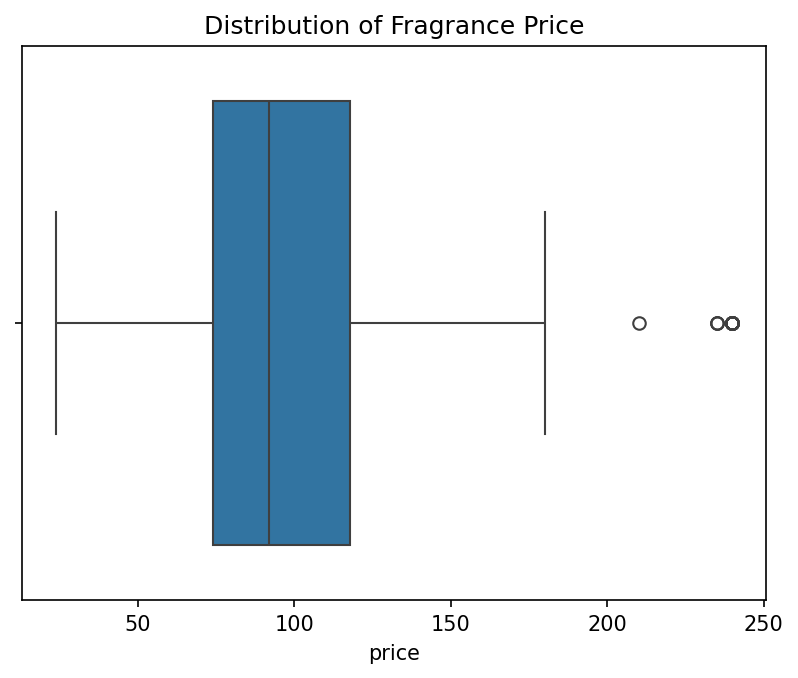

In [46]:
# prices boxplot
sns.boxplot(x=test_dataset['price'])
plt.title("Distribution of Fragrance Price");
print('The mean price index is: '+\
      str(round(test_dataset['price'].mean(), 2)))
print('The median price index is: '+\
      str(round(test_dataset['price'].median(), 2)))

The mean rating index is: 4.46
The median rating index is: 4.5


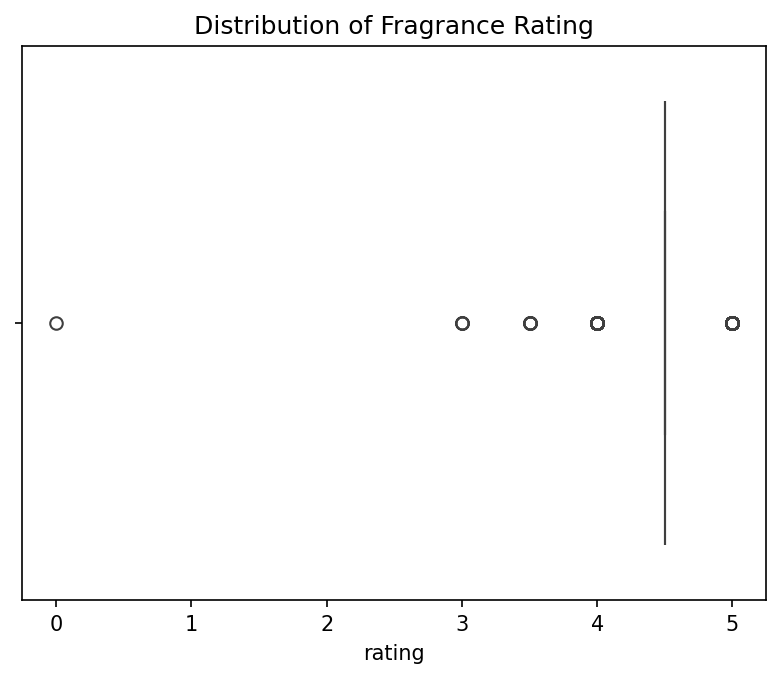

In [33]:
# ratings boxplot
plt.rcParams['figure.dpi'] = 150
sns.boxplot(x=test_dataset['rating'])
plt.title("Distribution of Fragrance Rating");
print('The mean rating index is: '+\
      str(round(test_dataset['rating'].mean(), 2)))
print('The median rating index is: '+\
      str(round(test_dataset['rating'].median(), 2)))

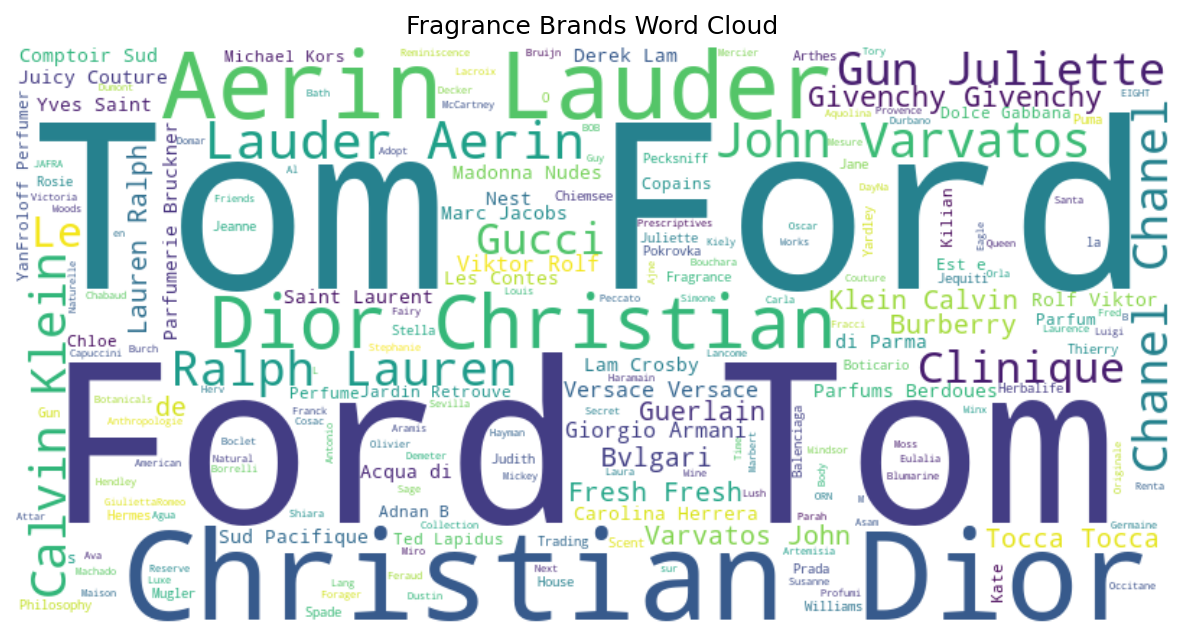

In [ ]:
# brand wordcloud
text = ' '.join(test_dataset['brand'].dropna())
wordcloud = WordCloud(width=800, height=400, 
    background_color='white').generate(text)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("Fragrance Brands Word Cloud")
plt.show()


In [44]:
# cleaning notes data
notes = pd.DataFrame(test_dataset['notes'])
remove = ['[', ']', '"', '{', '}','middle: ', 'top: ', 'base: ', 'null']
def strip_remove(txt):
    for item in remove:
        txt = txt.replace(item, "")
    return txt
test_dataset['notes'] = notes['notes'].astype(str).str.lower().apply(strip_remove)
test_dataset.head()

,category,name,rating,number_of_reviews,love,price,value_price,URL,ingredients,online_only,brand,main_accords,notes
0,Perfume,amber musk,4.5,77,5600,130.0,130.0,https://www.sephora.com/product/amber-musk-P38...,Alcohol Denat.- Amber Musk Fragrance- Water- B...,1,Aerin Lauder,"[""musky"", ""amber"", ""balsamic"", ""coconut"", ""ros...","ambroxan, coconut, rose, benzoin, musk, sandal..."
1,Perfume,gardenia rattan,4.0,17,1800,130.0,130.0,https://www.sephora.com/product/gardenia-ratta...,Alcohol Denat.- Gardenia Rattan Fragrance- Wat...,1,Aerin Lauder,"[""white floral"", ""marine"", ""animalic"", ""tubero...","gardenia, tuberose, tahitian tiare flower, mus..."
2,Perfume,ikat jasmine,4.5,52,4700,180.0,180.0,https://www.sephora.com/product/ikat-jasmine-P...,Alcohol Denat.- Ikat Jasmine Fragrance- Water-...,1,Aerin Lauder,"[""white floral"", ""tuberose"", ""animalic"", ""wood...","jasmine, egyptian jasmine, tuberose, honeysuck..."
3,Perfume,iris meadow,4.5,9,1400,130.0,130.0,https://www.sephora.com/product/iris-meadow-P3...,Alcohol Denat.- Fragrance- Water- Butyl Methox...,1,Aerin Lauder,"[""woody"", ""green"", ""powdery"", ""floral"", ""musky""]","iris, jasmine, cedar, musk, green notes, black..."
4,Perfume,lilac path,4.5,63,3800,130.0,130.0,https://www.sephora.com/product/lilac-path-P38...,Alcohol Denat.- Lilac Path Fragrance- Water- L...,1,Aerin Lauder,"[""white floral"", ""floral"", ""green"", ""musky"", ""...","galbanum, angelica, jasmine, orange blossom, l..."


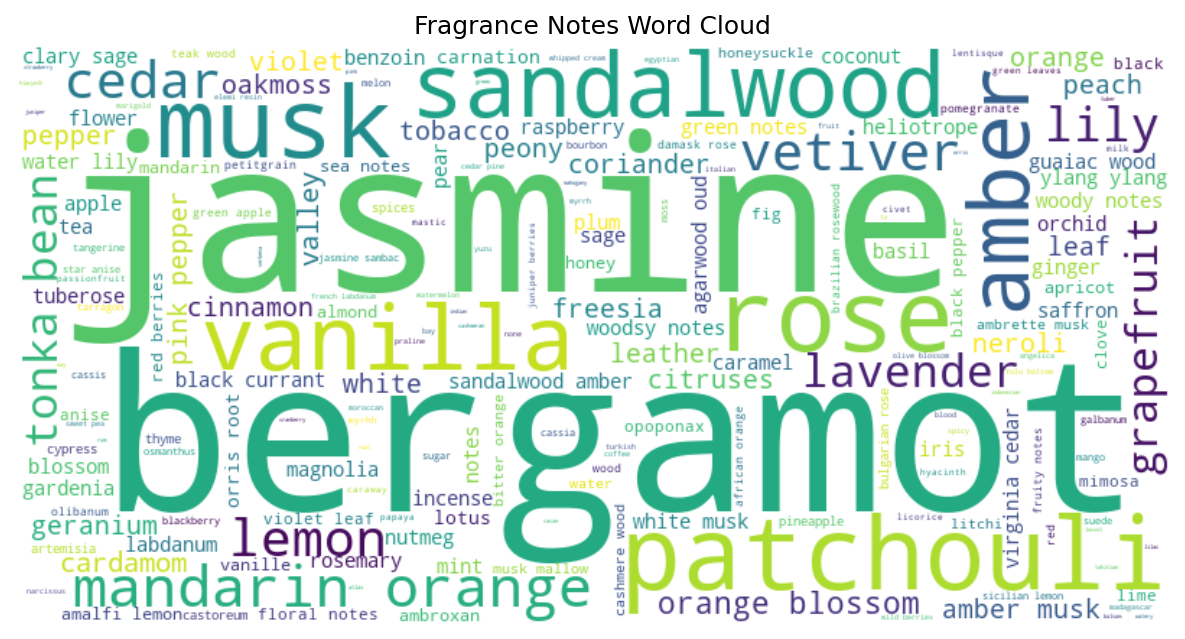

In [45]:
# notes wordcloud
text = ' '.join(test_dataset['notes'].dropna())
wordcloud = WordCloud(width=800, height=400, 
    background_color='white').generate(text)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("Fragrance Notes Word Cloud")
plt.show()
